<a href="https://colab.research.google.com/github/Naitik1245/Machine_Learning/blob/main/K_Means_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib  inline

In [ ]:
from sklearn.datasets import  load_iris
flower=load_iris()

In [ ]:
dir(flower)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df=pd.DataFrame(flower.data,columns=flower.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df.drop(df[['sepal length (cm)','sepal width (cm)']],axis='columns',inplace=True)

In [ ]:
df['target']=flower.target

In [ ]:
df


,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


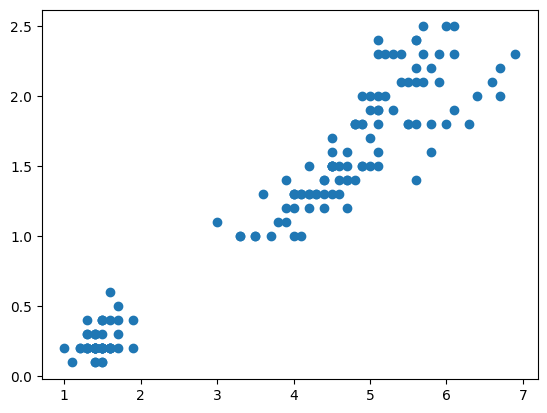

In [ ]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(df[['petal width (cm)']])


In [ ]:
df


,petal length (cm),petal width (cm),target
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [ ]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [ ]:
df['cluster']=y_predicted

In [ ]:
df

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,1
146,0.677966,0.750000,2,1
147,0.711864,0.791667,2,1
148,0.745763,0.916667,2,1


In [ ]:
df.drop('target',axis='columns')

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

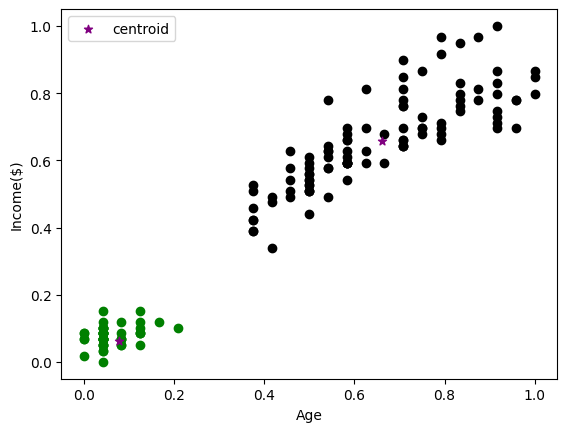

In [ ]:
plt.scatter(df1['petal width (cm)'],df1['petal length (cm)'],color='green')
plt.scatter(df2['petal width (cm)'],df2['petal length (cm)'],color='black')
plt.scatter(df3['petal width (cm)'],df3['petal length (cm)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [ ]:
sse=[]
k_rng= range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df)
  sse.append(km.inertia_)



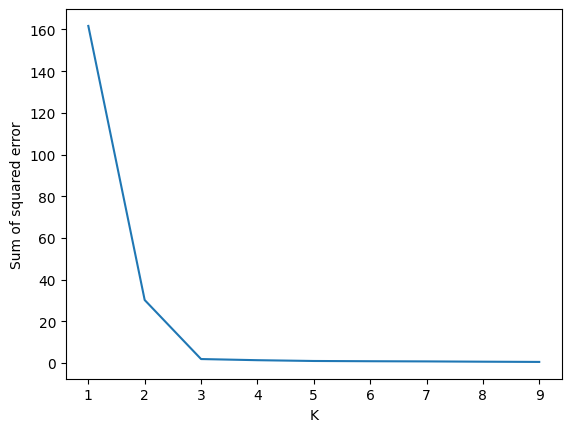

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
